# Desription
Bike sharing systems are a means of renting bicycles where the process of obtaining membership, rental, and bike return is automated via a network of kiosk locations throughout a city. Using these systems, people are able rent a bike from a one location and return it to a different place on an as-needed basis. Currently, there are over 500 bike-sharing programs around the world.

The data generated by these systems makes them attractive for researchers because the duration of travel, departure location, arrival location, and time elapsed is explicitly recorded. Bike sharing systems therefore function as a sensor network, which can be used for studying mobility in a city. In this competition, participants are asked to combine historical usage patterns with weather data in order to forecast bike rental demand in the Capital Bikeshare program in Washington, D.C.

# Data
You are provided hourly rental data spanning two years. For this competition, the training set is comprised of the first 19 days of each month, while the test set is the 20th to the end of the month. You must predict the total count of bikes rented during each hour covered by the test set, using only information available prior to the rental period.

Data Fields
datetime - hourly date + timestamp  
season -  1 = spring, 2 = summer, 3 = fall, 4 = winter 
holiday - whether the day is considered a holiday
workingday - whether the day is neither a weekend nor holiday
weather - 1: Clear, Few clouds, Partly cloudy, Partly cloudy 
2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist 
3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds 
4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog 
temp - temperature in Celsius
atemp - "feels like" temperature in Celsius
humidity - relative humidity
windspeed - wind speed
casual - number of non-registered user rentals initiated
registered - number of registered user rentals initiated
count - number of total rentals


Data Fields
1. datetime - hourly date + timestamp  
* season -  1 = spring, 2 = summer, 3 = fall, 4 = winter 
* holiday - whether the day is considered a holiday
* workingday - whether the day is neither a weekend nor holiday
* weather - 1: Clear, Few clouds, Partly cloudy, Partly cloudy 
	* 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist 
	* 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds 
	* 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog 
* temp - temperature in Celsius
* atemp - "feels like" temperature in Celsius
* humidity - relative humidity
* windspeed - wind speed
* casual - number of non-registered user rentals initiated
* registered - number of registered user rentals initiated
* count - number of total rentals

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

from sklearn.metrics import mean_squared_log_error

diro = 'C:\\Users\\Lenovo\\PycharmProjects\\Kaggle\\Project6_BikeDemand\\data\\'
train = pd.read_csv(diro + 'train.csv', parse_dates=True)
test = pd.read_csv(diro + 'test.csv')
samsub = pd.read_csv(diro + 'sampleSubmission.csv')

print('Import completed')

Import completed


In [3]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [4]:
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [40]:
train.datetime = pd.to_datetime(train.datetime)
test.datetime = pd.to_datetime(test.datetime)

In [6]:
train.dtypes

In [7]:
print('Number of rows \n\ttrain:{}\n\ttest:{}\nNumber of columns\n\ttrain:{}\n\ttest:{}'
      .format(train.shape[0], test.shape[0], train.shape[1], test.shape[1]))

Number of rows 
	train:10886
	test:6493
Number of columns
	train:12
	test:9


In [8]:
nans = pd.concat([train.isnull().sum(), test.isnull().sum()], axis=1)
nans.columns=['Train', 'Test']
print('Amount of Null values:\n')
print(nans.T)
print('\nColumns which are not in Test data: {}'.format(list(nans[nans['Test'] != 0].index)))

Amount of Null values:

       atemp  casual  count  datetime  holiday  humidity  registered  season  \
Train    0.0     0.0    0.0       0.0      0.0       0.0         0.0     0.0   
Test     0.0     NaN    NaN       0.0      0.0       0.0         NaN     0.0   

       temp  weather  windspeed  workingday  
Train   0.0      0.0        0.0         0.0  
Test    0.0      0.0        0.0         0.0  

Columns which are not in Test data: ['casual', 'count', 'registered']


In [9]:
# train.loc[:, common].describe().loc[['mean', 'min', 'max'], :]

## Prediction

## Prepara Data

#### Use only columns which occur in test set. 

In [41]:
common = list(set(train.columns).intersection(set(test.columns)))
train = train.loc[: , common + ['count']]
test = test.loc[: , common]

In [42]:
# convert datetime to month and day; month; hour
for table in [train, test]:
    ## create new fields
    table['year'] = pd.DatetimeIndex(table.datetime).year
    table['month'] = pd.DatetimeIndex(table.datetime).month
    table['day'] = pd.DatetimeIndex(table.datetime).day
    table['hour'] = pd.DatetimeIndex(table.datetime).hour
    table['year-month'] = train.datetime.dt.to_period('M')

train.drop('datetime', axis=1, inplace=True)

## Data Exploration

### Count per datetime

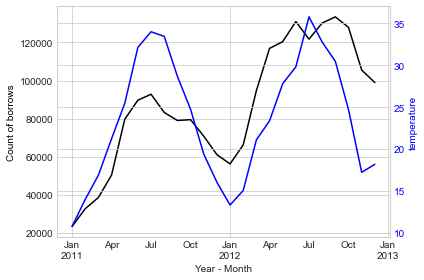

In [21]:
#dates = train.groupby(['year', 'month'])['count'].sum().index

# create year/month index

count = train.groupby(['year-month'])['count'].sum().values
temp = train.groupby(['year-month'])['atemp'].mean().values
year_month = train.groupby(['year-month'])['count'].sum().index
#time = time.astype('O')

fig, ax1 = plt.subplots()
train.groupby(['year-month'])['count'].sum().plot(ax=ax1, color='k')
ax1.set_xlabel('Year - Month')
#Make the y-axis label, ticks and tick labels match the line color.
ax1.set_ylabel('Total of rentals', color='k')
ax1.tick_params('y', color='k')

ax2 = ax1.twinx()
train.groupby(['year-month'])['atemp'].mean().plot(ax=ax2, color='b')
ax2.set_ylabel('temperature', color='b')
ax2.tick_params('y', colors='b')

fig.tight_layout()

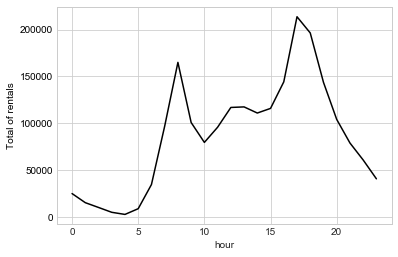

In [29]:
fig, ax = plt.subplots()
train.groupby(['hour'])['count'].sum().plot(color='k')
ax.set_ylabel('Total of rentals', color='k')
ax.tick_params('y', colors='k')

## Prediction

### Base prediction

Using Average from year/month/hour 

In [60]:
# split the train set into train_test and train_train subsets for validation of my base prediction. 
# the split needs to be made like: first 15 days of the month for train and rest 5 into test to 
# make laboratory conditions of real test set. 
from sklearn.metrics import mean_squared_log_error


train_train = train.query('day <= 15')
train_test = train.query('day > 15')

## build "prediction table":
y_pred = pd.DataFrame(round(train_train.groupby(['year', 'month', 'hour'])['count'].mean()))
y_pred.columns = ['count_pred']

## cutt train_test to show only valid coulumns
train_test = train_test.loc[:, ['year', 'month', 'hour', 'count']]

## join train_test with y_pred
prediction = pd.merge(train_test, y_pred, left_on=['year', 'month', 'hour'], right_index=True)

## check accuracy
train_error = mean_squared_log_error(prediction['count'], prediction['count_pred'])

# reproduce it on Test set
X_train = pd.DataFrame(round(train.groupby(['year', 'month', 'hour'])['count'].mean()))
Y = test.loc[:, ['datetime', 'year', 'month', 'hour']]
y_pred = pd.merge(Y, X_train, left_on=['year', 'month', 'hour'], right_index=True)
y_pred.drop(['year', 'month', 'hour'], axis=1, inplace=True)
y_pred['count'] = y_pred['count'].apply(lambda x: int(x))
y_pred = y_pred.sort_values(by='datetime')
y_pred.to_csv(diro + 'Base prediction.csv', index=False)

kaggle_error = 70.87
print('Train score: {}\nKaggle score: {}'.format(round(train_error*100, 2), kaggle_error))

Train score: 40.65
Kaggle score: 70.87


In [53]:
y_pred  

,datetime,count
0,2011-01-20 00:00:00,14.0
24,2011-01-21 00:00:00,14.0
48,2011-01-22 00:00:00,14.0
71,2011-01-23 00:00:00,14.0
94,2011-01-24 00:00:00,14.0
117,2011-01-25 00:00:00,14.0
140,2011-01-26 00:00:00,14.0
164,2011-01-28 00:00:00,14.0
187,2011-01-29 00:00:00,14.0
210,2011-01-30 00:00:00,14.0
